In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import re
import zipfile

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

1. Okay first we have got to atleast know what the files inside the zip are to know what to read csv or talbe or xls and so on. One way is to manually just check inside it another one is using Python's zipfile library to have a quick peek into the zip and to see the file's format and how many files are there. Which i tend to do to show another way of making life tough with coding.

In [2]:
with zipfile.ZipFile('data/spotify_most_streamed_2024.zip', 'r') as zip_ref:
    file_list = zip_ref.namelist()
    print("Files in the zip archive:", file_list)

Files in the zip archive: ['Most Streamed Spotify Songs 2024.csv']


Some explanations quickly about the ziplfile reading
- This creates a ZipFile object representing the ZIP file spotify_most_streamed_2024.zip located in the data directory. The 'r' mode specifies that the file is opened in read mode.
- as zip_ref: This assigns the ZipFile object to the variable zip_ref for use within the with block.
- The with statement ensures that the ZIP file is properly closed after its suite finishes, even if an exception is raised.

2. So it's a csv file. Let's open the file using pandas. We will add the argument (compression = 'zip'), that specifies that the file is compressed using ZIP format.

In [3]:
spotify_data = pd.read_csv('data/spotify_most_streamed_2024.zip', compression = 'zip')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 2679: invalid start byte

2. As it can be seen there is an encoding problem, which means there are some special characters in the data that need taken care of. Now we will add another argument (encoding = 'unicode_escape') which handles special characters that might be present in the file.

In [4]:
spotify_data = pd.read_csv('data/spotify_most_streamed_2024.zip', compression = 'zip',  encoding='unicode_escape')

In [5]:
spotify_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


3. As it can be seen this now works and we have a DataFrame of the dataset.

### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

1. Let's check what is up with all the datatypes to see whether they make sense

In [6]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

2. From what I see on first sight there are many many object datatypes where they should be numerical in my opinion, like spotify streams and Youtube views just for example.I can only see 4 that make sense to be object (Track, Album name, Artist and the ISRC as its mixed values) . Release date could be date time. There are missing values in almost every column but as it can be seen the whole TIDAL Populatiry column is just NaN values so we can remove it. Soundcloud streams also has more than 50% just missing values Let's see why are the numerical an object by looking at some of the columns. And then decide what to do with all those missing values.

In [7]:
spotify_data['Spotify Streams'].unique()

array(['390,470,936', '323,703,884', '601,309,283', ..., '189,972,685',
       '145,467,020', '255,740,653'], dtype=object)

In [8]:
spotify_data['Spotify Streams'].value_counts(dropna = False)

Spotify Streams
NaN              113
1,655,575,417      4
1,642,258,500      3
717,849,037        2
114,947,522        2
                ... 
133,536,914        1
9,736,339          1
2,265,551,950      1
328,017,675        1
255,740,653        1
Name: count, Length: 4426, dtype: int64

In [9]:
spotify_data['Spotify Playlist Count'].unique()

array(['30,716', '28,113', '54,331', ..., '72,066', '14,037', '32,138'],
      dtype=object)

In [10]:
spotify_data['Spotify Playlist Count'].value_counts(dropna = False)

Spotify Playlist Count
NaN       70
1         46
2         24
3         19
5         18
          ..
15,136     1
8,444      1
59,365     1
51,117     1
32,138     1
Name: count, Length: 4208, dtype: int64

3. The datatype objects is due the fact that the numbers are seperated by a comma we can remove the comma and turn them into numerical but this will mean dealing with a lot of NaN values.So for now we won't. Let's first get rid of the Tidal column.

In [11]:
spotify_data.drop(columns=['TIDAL Popularity'], inplace=True)

4. Let's rename all the columns into snake_case format so that they are easy to work with.

In [12]:
 """
    Convert a column name to snake_case.

    This function takes a column name as input and converts it to snake_case format.
    Snake_case format means all characters are lowercase and spaces or periods are replaced with underscores.

    Parameters:
    column_name (str): The name of the column to be converted.

    Returns:
    str: The converted column name in snake_case format.
 """
def convert_to_snake_case(column_name):
    return column_name.lower().replace('.', '_').replace(' ', '_')

In [13]:
spotify_renamed_columns = spotify_data.rename(columns=lambda col: convert_to_snake_case(col))

5. Let's convert the release date to pd.datetime

In [14]:
spotify_renamed_columns['release_date'] = pd.to_datetime(spotify_renamed_columns['release_date'])

In [15]:
spotify_renamed_columns['release_date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: release_date, Length: 4600, dtype: datetime64[ns]

In [16]:
spotify_renamed_columns

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,412,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,204,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",0


6. Okay let's now try and do something about the datatypes, most columns have NaN so removing them will cost the loss of significant data, we can impute the values as 0 or something else but for now i might leave it as NaN and try to just convert them to numeric and format the output so it can be easily readible.

In [17]:
def convert_columns_to_numeric(df, columns):
    """
    Converts specified columns in a DataFrame from object to numeric by
    removing commas and handling errors.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to convert.
    columns (list): List of column names to be converted to numeric.

    Returns:
    pd.DataFrame: DataFrame with specified columns converted to numeric.
    """
    for col in columns:
        if col in df.columns:
            # Remove commas
            df[col] = df[col].astype(str).str.replace(',', '', regex=False) 
            
            # Convert to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')  
        
    return df

# Example usage
columns_to_convert = spotify_renamed_columns.columns[5:27]
spotify_data_columns_to_numeric = convert_columns_to_numeric(spotify_renamed_columns, columns_to_convert)

7. Now let's format the dispay option so that we see the numbers seperated by comma for the people to read, behind it all it's still in the scientific notation for example 255,740,653 is 2.557407e+08(This notation is used for large numbers to make them easier to read and work with, particularly in programming and data science.)

In [18]:
pd.options.display.float_format = '{:,.0f}'.format

In [19]:
spotify_data_columns_to_numeric.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                          int64
track_score                          float64
spotify_streams                      float64
spotify_playlist_count               float64
spotify_playlist_reach               float64
spotify_popularity                   float64
youtube_views                        float64
youtube_likes                        float64
tiktok_posts                         float64
tiktok_likes                         float64
tiktok_views                         float64
youtube_playlist_reach               float64
apple_music_playlist_count           float64
airplay_spins                        float64
siriusxm_spins                       float64
deezer_playlist_count                float64
deezer_playlist_reach                float64
amazon_pla

In [34]:
spotify_data_columns_to_numeric

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725,"390,470,936","30,716","196,631,588",...,"40,975",684,62,"17,598,718",114,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,546,"323,703,884","28,113","174,597,137",...,"40,778",3,67,"10,422,430",111,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538,"601,309,283","54,331","211,607,669",...,"74,333",536,136,"36,321,847",172,"5,022,621","5,639","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,445,"2,031,280,633","269,802","136,569,078",...,"1,474,799","2,182",264,"24,684,248",210,"190,260,277","203,384",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423,"107,034,922","7,223","151,469,874",...,"12,185",1,82,"17,660,624",105,"4,493,884","7,006","207,179","457,017",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19,"305,049,963","65,770","5,103,054",...,6,NaN,2,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19,"52,282,360","4,602","1,449,767",...,412,NaN,1,927,NaN,NaN,NaN,NaN,"193,590",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19,"189,972,685","72,066","6,704,802",...,204,NaN,1,74,6,"84,426,740","28,999",NaN,"1,135,998",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19,"145,467,020","14,037","7,387,064",...,"1,200",NaN,NaN,NaN,7,"6,817,840",NaN,NaN,"448,292",0


### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

1. Let's see who are the top 5 artist with most songs in the set using a variable that is clean of NaNs while keeping the original dataset.

In [90]:
artists_cleaned = spotify_renamed_columns[['artist']].dropna()

In [94]:
artist_most_songs = artists_cleaned.value_counts()
top_5_artists = artist_most_songs.head(5)
top_5_artists

artist      
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

2. Now that we have the artist with most songs in the set let's see the artists with the least explicit songs.

In [27]:
non_explicit_songs = spotify_renamed_columns[spotify_renamed_columns['explicit_track'] == 0]
artist_song_counts = non_explicit_songs['artist'].value_counts()
top_5_clean_mouthed_artists = artist_song_counts.head(5)
top_5_clean_mouthed_artists

artist
Taylor Swift     50
Billie Eilish    25
Bad Bunny        18
KAROL G          18
Morgan Wallen    17
Name: count, dtype: int64

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

1. Let's make sure the dtype is numerical so we can work with it

In [29]:
spotify_renamed_columns.spotify_streams.dtypes

dtype('float64')

In [30]:
spotify_renamed_columns.spotify_streams.unique()

array([3.90470936e+08, 3.23703884e+08, 6.01309283e+08, ...,
       1.89972685e+08, 1.45467020e+08, 2.55740653e+08])

2. As i said behind the facade the numbers are in this notation so that they are easy to work with, what you see in the DataFrame is just for an easier reading.
3. Now let's see the top 5 most streamed artists. We will take all songs for all artists(as many have more than one song in the set) and take their totals and then compare them one another to get the artist with most streams(not only for one song)
4. First we will group the artist with their spotify streams and will calculate the total, then i will create a dataframe to exlpore only the values i want to validade and see wheter it looks okay and also to represent the top 5 artists in a nice frame that is easy to understand.

In [107]:
cleaned_artist_and_spotify_streams = spotify_renamed_columns[['artist', 'spotify_streams']].dropna()
artist_streams = cleaned_artist_and_spotify_streams.groupby('artist')['spotify_streams'].sum()
artist_streams_df = artist_streams.reset_index()
artist_streams_df.columns = ['artist', 'total_streams']

In [108]:
top_artists = artist_streams_df.sort_values(by='total_streams', ascending=False).head(5)

In [109]:
top_artists

,artist,total_streams
178,Bad Bunny,"37,054,834,425"
1653,The Weeknd,"36,948,540,278"
491,Drake,"34,962,157,577"
1615,Taylor Swift,"34,470,771,165"
1361,Post Malone,"26,137,472,958"


5. As it can be seen the most streamed spotify artists are Bad Bunny, The Weekend, Drake, Taylor Swift and Post Malone

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

1. First lets get only the year and the month from the realease date column (using dt.year to get only the year from the converted to DateTime format values)

In [57]:
songs_per_year = spotify_renamed_columns['release_date'].dt.year.value_counts().sort_index()

In [58]:
songs_per_year

release_date
1987       1
1991       1
1994       1
1998       1
1999       1
2000       2
2001       1
2002       5
2003       3
2004       5
2005       5
2006       3
2007       5
2008      11
2009      15
2010      27
2011      51
2012      47
2013      55
2014      70
2015      96
2016     123
2017     213
2018     249
2019     296
2020     360
2021     408
2022     694
2023    1158
2024     693
Name: count, dtype: int64

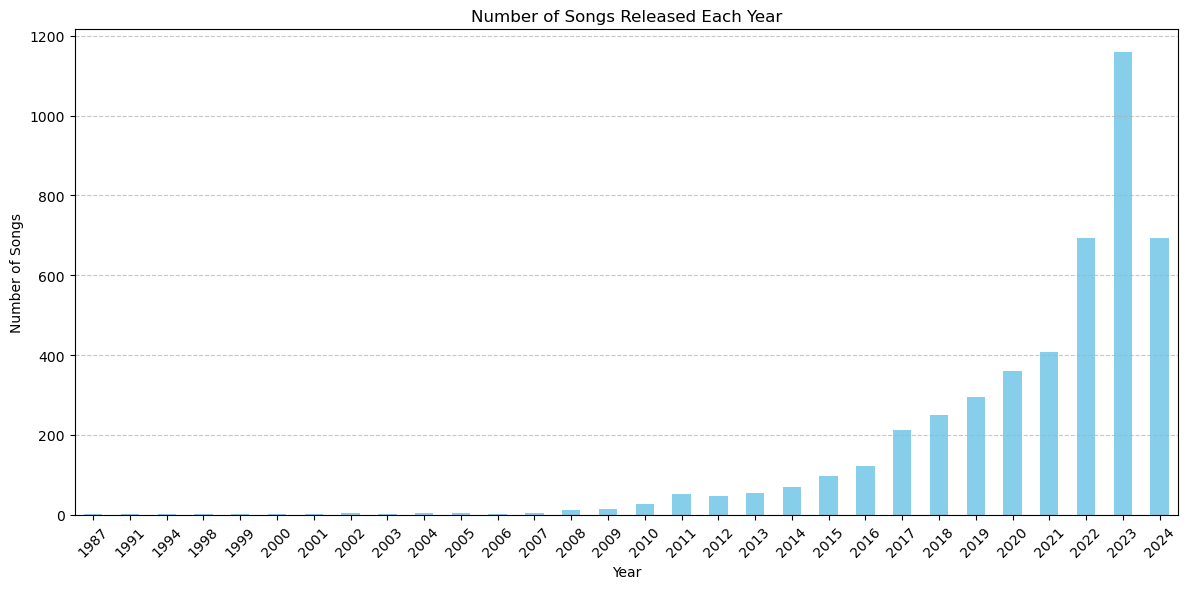

In [59]:
plt.figure(figsize=(12, 6))
songs_per_year.plot(kind='bar', color='skyblue') # using the df.plot with kind = 'bar' to directly make a bar chart using the data without manual adjustments
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

2. As it can be seen every next year sees a growth in the number of songs released and then at 2024 the increase rapidly stops. For me that is mainly caused by the reason that the year 2024 hasn't ended yet and there are more songs to be released until the end of the year and the dataset isn't complete for this year.
3. We can now also look at which months are most popular to release music throughout the years.

In [60]:
songs_per_month = spotify_renamed_columns['release_date'].dt.month.value_counts().sort_index()

In [61]:
songs_per_month

release_date
1     503
2     371
3     430
4     420
5     511
6     395
7     321
8     315
9     328
10    384
11    350
12    272
Name: count, dtype: int64

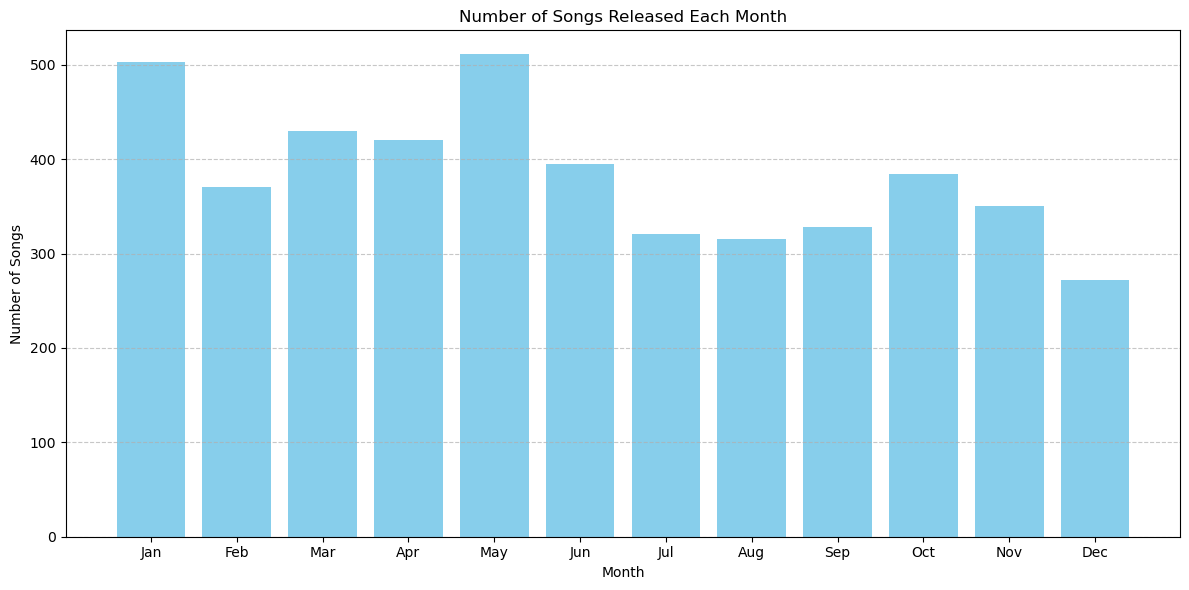

In [62]:
plt.figure(figsize=(12, 6))
plt.bar(songs_per_month.index, songs_per_month.values, color='skyblue')
plt.title('Number of Songs Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4. As we can see the first half of the year is more popular for releasing music with May taking the first place followed by Janurary.

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

1. Let's first begin by making a variable that contains the columns needed for this and clean them from any NaN values.

In [256]:
playlist_data_cleaned_spotify_renamed = spotify_renamed_columns[['spotify_playlist_count','apple_music_playlist_count','deezer_playlist_count','amazon_playlist_count']].dropna()

In [267]:
playlist_data_cleaned_spotify_renamed

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
0,"30,716",210,62,114
1,"28,113",188,67,111
2,"54,331",190,136,172
3,"269,802",394,264,210
4,"7,223",182,82,105
...,...,...,...,...
4590,"42,233",21,22,8
4591,"84,220",33,10,1
4592,"15,387",8,9,1
4597,"72,066",19,1,6


2. Now let's see the different methods to measure correlation(Pearson, Spearman, Kendall). And with them to plot heatmaps to see the correlation between different columns.
3. Pearson Correlation: Measures linear relationships. Values close to 1 or -1 indicate strong linear relationships, while values close to 0 indicate weak or no linear relationship.
4. Spearman Correlation: Measures monotonic relationships. It is based on the rank of data points.
5. Kendall Correlation: Measures the strength of dependence between two variables.

In [259]:
correlation_matrix_pearson = playlist_data_cleaned_spotify_renamed.corr(method='pearson')
correlation_matrix_spearman = playlist_data_cleaned_spotify_renamed.corr(method='spearman')
correlation_matrix_kendall = playlist_data_cleaned_spotify_renamed.corr(method='kendall')

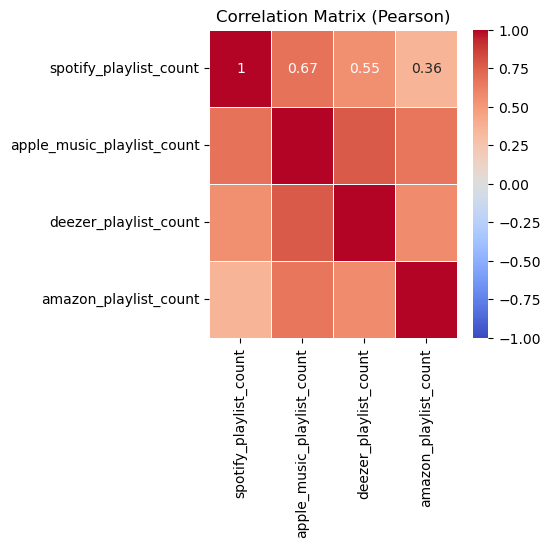

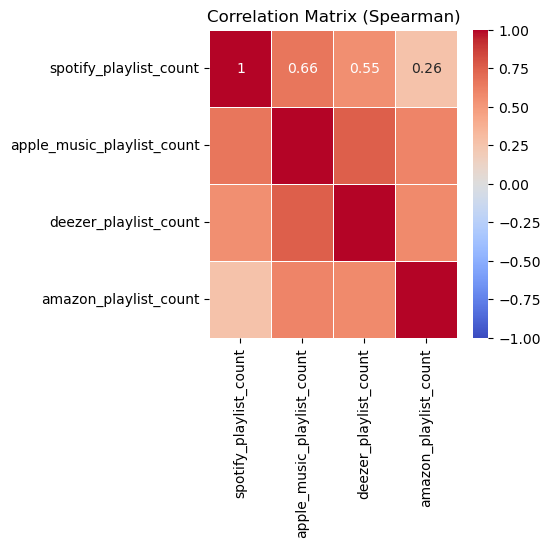

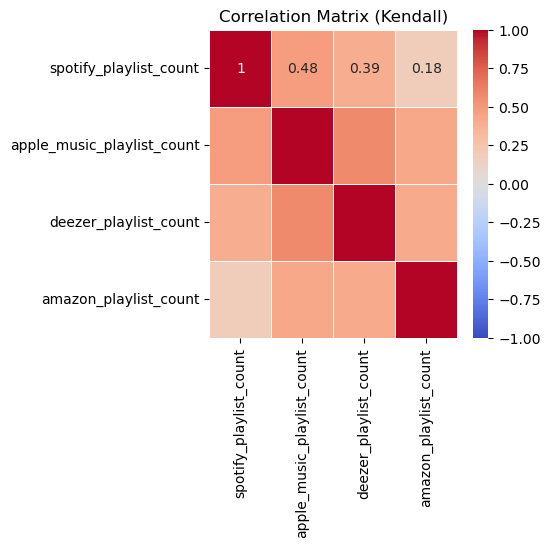

In [268]:
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(4, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot correlation heatmaps for each method
plot_correlation_heatmap(correlation_matrix_pearson, 'Correlation Matrix (Pearson)')
plot_correlation_heatmap(correlation_matrix_spearman, 'Correlation Matrix (Spearman)')
plot_correlation_heatmap(correlation_matrix_kendall, 'Correlation Matrix (Kendall)')

6. Across all three correlation methods, the strongest correlations are between Spotify and Apple Music playlist counts, indicating a consistent relationship between these services.
7. The strongest correlations are between Spotify and Apple Music playlist counts, indicating that users who add songs to playlists on Spotify are also likely to add the same songs to playlists on Apple Music.
8. There are moderate correlations between Spotify and Deezer, and Apple Music and Deezer, suggesting some level of consistency in user behavior across these platforms.
9. The weakest correlations are between Spotify and Amazon Music playlist counts, indicating less consistency in user behavior between these two platforms compared to others.

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

1. Let's first create a clean of NaN's variable that we will use to explore the likes and views

In [111]:
youtube_data_claned_spotify_renamed = spotify_renamed_columns[['youtube_views', 'youtube_likes']].dropna()

2. As we need to vizualize the relationship between two variables i think it will be appropriate to use a scatter plot to see the correlation, distribution and potential outliers. I will plot both a logarithmic scale to handle wide range of values and linear to see where they are clustered

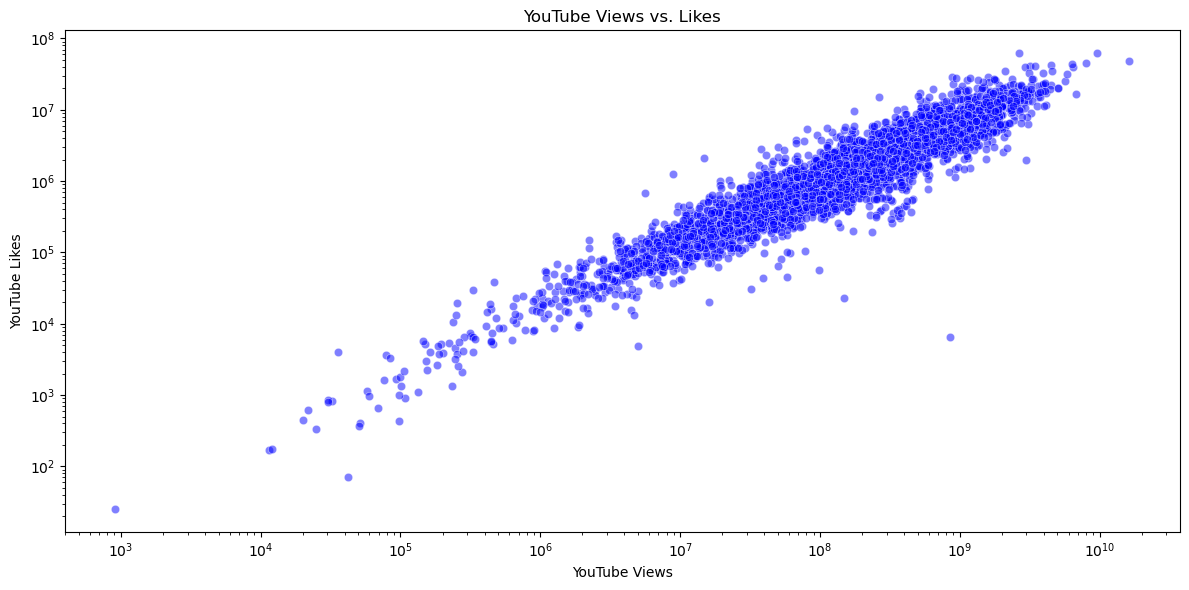

In [121]:
plt.figure(figsize=(12, 6))
sns.scatterplot(youtube_data_claned_spotify_renamed, x='youtube_views', y='youtube_likes', alpha=0.5, color='blue')
plt.title('YouTube Views vs. Likes')
plt.xlabel('YouTube Views')
plt.ylabel('YouTube Likes')
plt.xscale('log')  # Use log scale if data spans several orders of magnitude
plt.yscale('log')  # Use log scale if data spans several orders of magnitude
plt.tight_layout()
plt.show()

3. The plot shows a strong positive correlation between YouTube views and likes. As the number of views increases, the number of likes also increases.
4. This relationship indicates that videos with higher view counts generally receive more likes, reflecting higher engagement.
5. There is a dense cluster of points along a diagonal line, indicating that many videos follow a consistent ratio of views to likes.
6. Some points are spread out from the main cluster, indicating outliers. These could be videos that are either highly liked relative to their views or have high views but relatively fewer likes. 

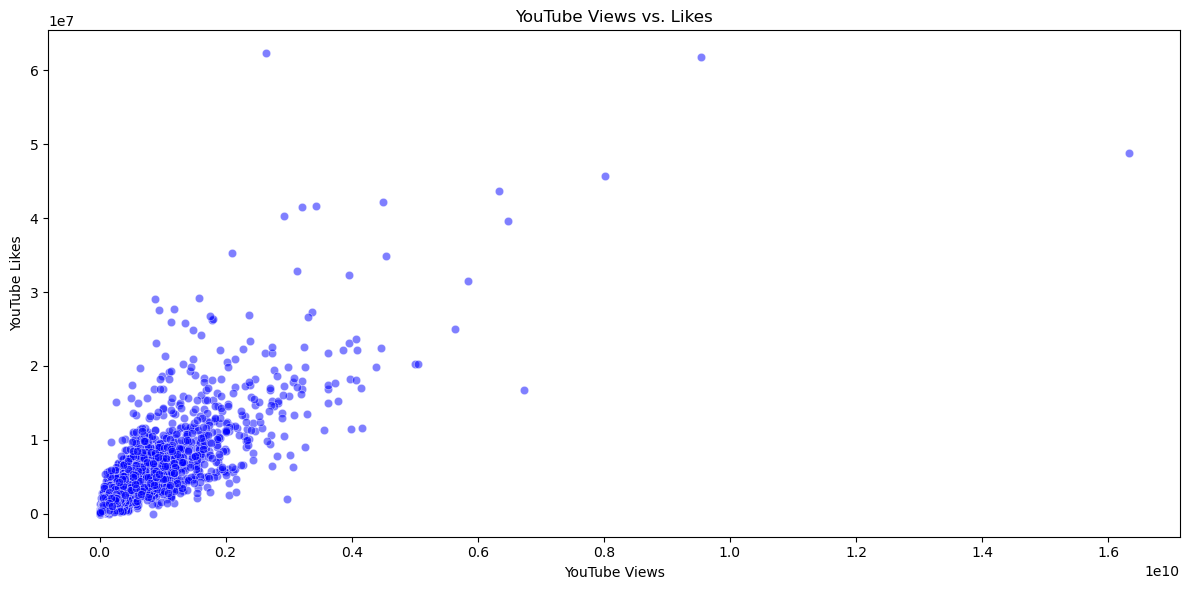

In [122]:
plt.figure(figsize=(12, 6))
sns.scatterplot(youtube_data_claned_spotify_renamed, x='youtube_views', y='youtube_likes', alpha=0.5, color='blue')
plt.title('YouTube Views vs. Likes')
plt.xlabel('YouTube Views')
plt.ylabel('YouTube Likes')
plt.tight_layout()
plt.show()

7. The scatter plot still shows a positive correlation between YouTube views and likes. As the number of views increases, the number of likes also tends to increase.
8. The relationship appears to be roughly linear, but the data points are more spread out compared to the log scale plot.
9. There is a significant cluster of data points near the lower end of both axes, indicating that many videos have relatively lower numbers of views and likes.
10. The dense cluster suggests that most videos do not reach very high numbers of views and likes.
11. The plot highlights a few outliers with very high views and likes, which are more spread out from the main cluster.
12. Let's now calculate the mean ratio between views and likes

In [153]:
ratio = youtube_data_claned_spotify_renamed['youtube_views'] / youtube_data_claned_spotify_renamed['youtube_likes']

In [154]:
ratio

0       49
1       33
2       55
3      103
4       21
        ..
4595   107
4596   177
4597   186
4598   289
4599   226
Length: 4285, dtype: float64

In [156]:
mean_ratio = ratio.mean()
mean_ratio

169.1161131790719

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


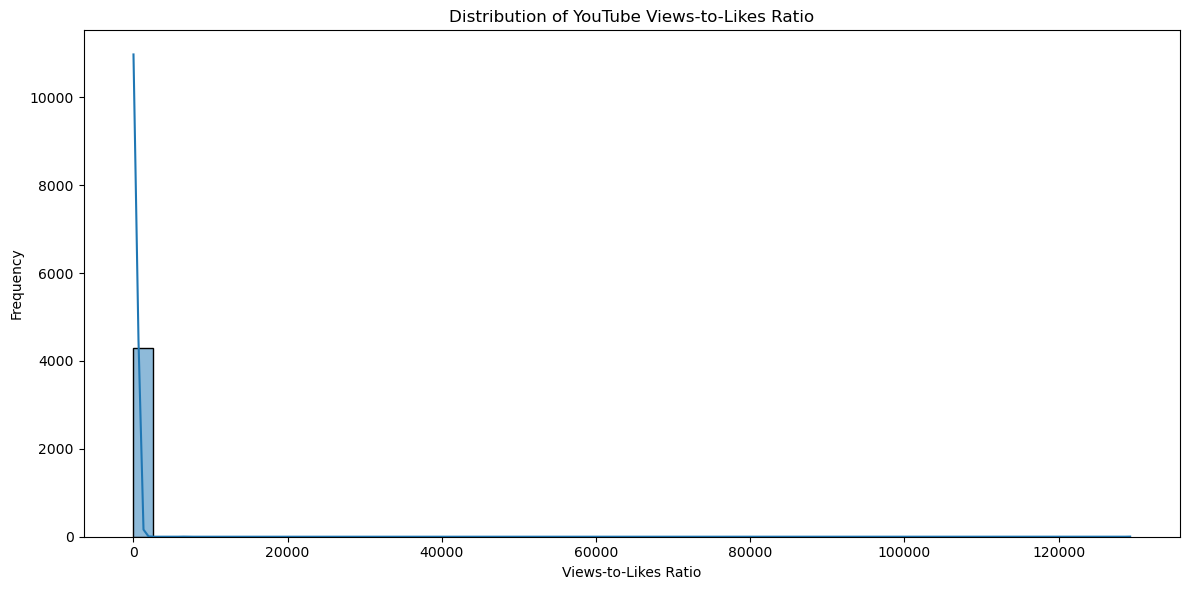

In [175]:
plt.figure(figsize=(12, 6))
sns.histplot(ratio, bins=50, kde=True)
plt.title('Distribution of YouTube Views-to-Likes Ratio')
plt.xlabel('Views-to-Likes Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

13. The distribution is heavily skewed to the right. Most of the values are clustered at the lower end of the ratio spectrum, creating a very high peak near zero.
14. The long tail extending to the right indicates the presence of a few videos with very high views-to-likes ratios.
15. The tall peak at the low end of the x-axis suggests that the majority of videos have a relatively small number of views per like.

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

1. Let's first extract only the year from the release date and sort it above 2016 and see the most popular songs in each year

In [237]:
year_for_tiktok = spotify_renamed_columns['release_year'] = spotify_renamed_columns['release_date'].dt.year
tiktok_data = spotify_renamed_columns[spotify_renamed_columns['release_year'] >= 2016]

In [238]:
year_for_tiktok

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: release_date, Length: 4600, dtype: int32

2. Now let's see the most popular songs for every year.

In [248]:
most_popular_song_per_year = tiktok_data.loc[tiktok_data.groupby('release_year')['tiktok_views'].idxmax()]

In [250]:
most_popular_songs = most_popular_song_per_year[['release_year', 'track', 'artist', 'tiktok_views']]
most_popular_songs = most_popular_songs.sort_values('release_year')
most_popular_songs

,release_year,track,artist,tiktok_views
550,2016,Unstoppable,Sia,"14,808,888,629"
1145,2017,Infinity,Jaymes Young,"22,241,102,823"
1547,2018,Funny Song,Cavendish Music,"38,373,644,011"
474,2019,Oh No,Kreepa,"61,088,562,861"
3377,2020,Spongebob,Dante9k,"33,359,398,879"
26,2021,STAY (with Justin Bieber),The Kid LAROI,"23,712,377,029"
113,2022,Aesthetic,Tollan Kim,"33,870,791,454"
3,2023,Flowers,Miley Cyrus,"14,603,725,994"
23,2024,TEXAS HOLD 'EM,Beyoncï¿,"6,518,604,175"


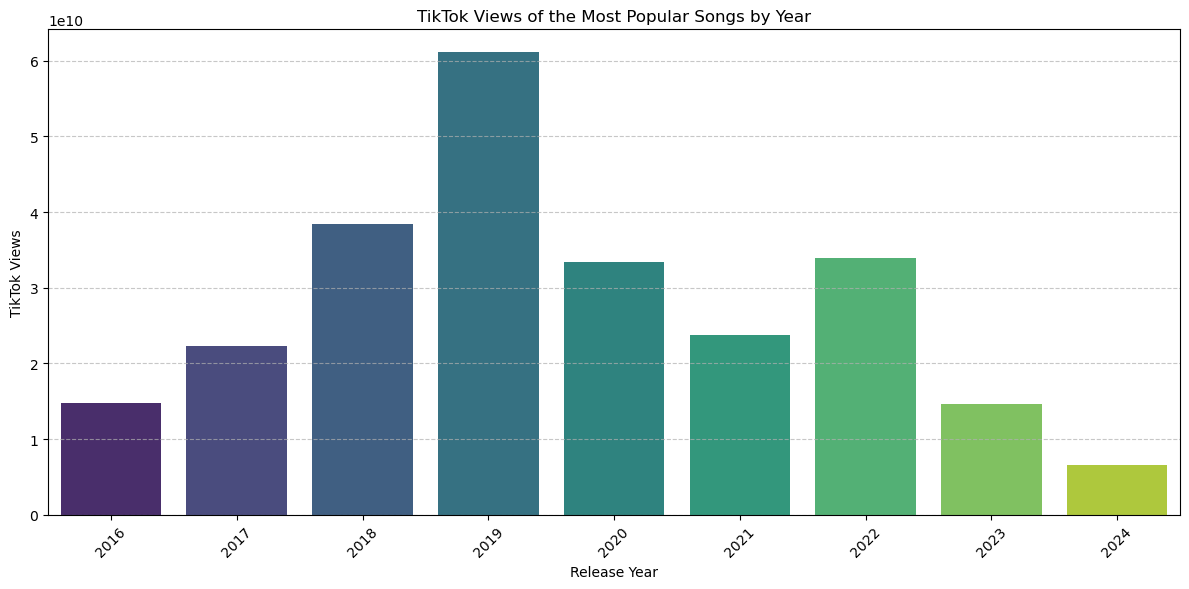

In [251]:
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='tiktok_views', data=most_popular_songs, palette='viridis')
plt.title('TikTok Views of the Most Popular Songs by Year')
plt.xlabel('Release Year')
plt.ylabel('TikTok Views')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. As it can be seen since the start of tik tok music has seen a progressive growth in popularity. And the song from the year 2019 reaches the highest peak followed by 2018's. The songs that peaked high in 2018 and 2019 aren't mainstream songs created by well known artists unlike every other years's top songs. They are rather songs that were associated with some viral trend or challenges that made the song widespread.
4. The fluctuation in views reflects the dynamic nature of TikTok trends. Some years see songs that achieve viral status and massive engagement, while other years have relatively fewer views.
5. The overall trend from 2016 to 2019 shows an increase in views, reflecting TikTok's growing user base and its increasing influence on music popularity.
6. The fluctuations post-2019 might reflect changes in user engagement, the nature of viral content, or external factors such as global events affecting user behavior.
7. Now let's see the tik tok views per year to see the year that peaked most views and to see wheter the assumption that the user engagement has fluctated or just the most listened to songs haven't been a viral challenge or trend like 2018 and 2019's

In [239]:
tiktok_views_per_year = tiktok_data.groupby('release_year')['tiktok_views'].sum().sort_index()

In [240]:
tiktok_views_per_year 

release_year
2016    78,330,317,089
2017   174,362,854,260
2018   267,661,151,841
2019   394,210,724,566
2020   533,191,896,010
2021   631,177,503,424
2022   832,975,012,888
2023   454,816,188,900
2024    47,470,965,442
Name: tiktok_views, dtype: float64

In [241]:
mean_tiktok_views_per_year = total_tiktok_views_per_year / count_songs_per_year

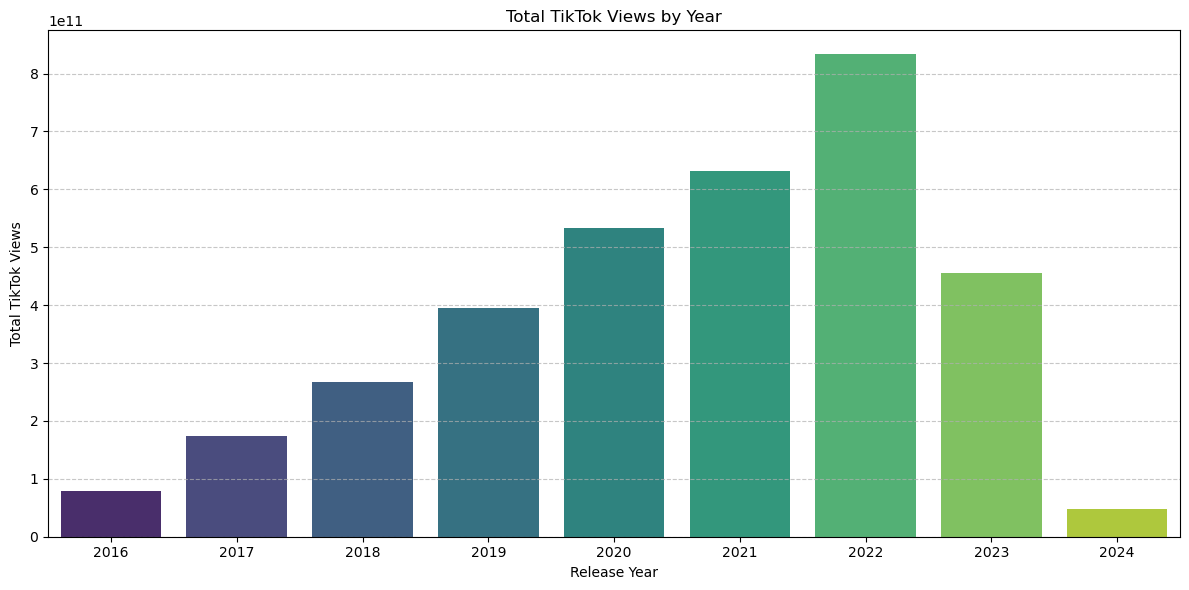

In [242]:
plt.figure(figsize=(12, 6))
sns.barplot(x=tiktok_views_per_year.index, y=tiktok_views_per_year.values, palette='viridis')
plt.title('Total TikTok Views by Year')
plt.xlabel('Release Year')
plt.ylabel('Total TikTok Views')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8. Here we can see that since the release of tik tok the views are growing, indicating engagement and popularity of TikTok. And unlike the assumption i made about the most viewed songs per year, the views didn't fluctade after 2019 it kept on going up strong right up to 2022. But after 2022 it can be seen a decline in total views in 2023, which could be due many reasosns from algorithm to other reasons that change the user engagement. But the year 2024 is the one with the most critical decline,now showing views below the year of the platform's first release. This could be to put down to many factors, but the one that makes sense is that the data isn't complete as the year of 2024 isn't even halfway done so we could appropriately judge the performance of this year after we have the complete set for the whole year of 2024
9. Now let's see the mean tik tok views per year and compare them to the most famous song of every year.

In [243]:
mean_tiktok_views_per_year = tiktok_data.groupby('release_year')['tiktok_views'].mean()

In [244]:
mean_tiktok_views_per_year

release_year
2016     669,489,890
2017     898,777,599
2018   1,158,706,285
2019   1,345,429,094
2020   1,559,040,632
2021   1,660,993,430
2022   1,365,532,808
2023     513,336,556
2024     252,505,135
Name: tiktok_views, dtype: float64

In [245]:
most_popular_song_per_year = tiktok_data.loc[tiktok_data.groupby('release_year')['tiktok_views'].idxmax()]

In [246]:
comparison_data = most_popular_song_per_year[['release_year', 'tiktok_views', 'track', 'artist']].copy()
comparison_data['mean_tiktok_views'] = comparison_data['release_year'].map(mean_tiktok_views_per_year)
comparison_data['views_to_mean_ratio'] = comparison_data['tiktok_views'] / comparison_data['mean_tiktok_views']
comparison_data = comparison_data.sort_values('release_year')

In [247]:
comparison_data

,release_year,tiktok_views,track,artist,mean_tiktok_views,views_to_mean_ratio
550,2016,"14,808,888,629",Unstoppable,Sia,"669,489,890",22
1145,2017,"22,241,102,823",Infinity,Jaymes Young,"898,777,599",25
1547,2018,"38,373,644,011",Funny Song,Cavendish Music,"1,158,706,285",33
474,2019,"61,088,562,861",Oh No,Kreepa,"1,345,429,094",45
3377,2020,"33,359,398,879",Spongebob,Dante9k,"1,559,040,632",21
26,2021,"23,712,377,029",STAY (with Justin Bieber),The Kid LAROI,"1,660,993,430",14
113,2022,"33,870,791,454",Aesthetic,Tollan Kim,"1,365,532,808",25
3,2023,"14,603,725,994",Flowers,Miley Cyrus,"513,336,556",28
23,2024,"6,518,604,175",TEXAS HOLD 'EM,Beyoncï¿,"252,505,135",26


10. The most popular songs each year achieve significantly higher views compared to the average.
11. Some years see particularly high peaks, such as 2019 with "Oh No" by Kreepa, reflecting the viral nature of certain tracks.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.